# Predicting whether a customer will default on his/her credit card

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
import warnings

warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv(r'default of credit card clients.xls - Data.csv')

In [4]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


id - id of the client
limit_bal - amount of given credit in NT dollars
education - 1 = graduate school , 2=university, 3 = high school , 0,4,5,6 = others
marriage - 0=others , 1=married,2=single,3=others
age - age in years
scale of PAY_0 to PAY_6 : ( -2 = no assumption , -1 = paid in full , 0=use of revolving credit(paid minimum only) , 1= payment delay for one month, 2= delay for 2 months, 8 = delay for 8 months,9=delay for 9 months or more

In [8]:
len(df[df.duplicated()])

0

In [9]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
# u can do this to convert categorical data to numerical also
#df.replace({'SEX':{1:'Male',2:'Female'}},inplace=True)
#df.replace({'EDUCATION':{1:'Graduate School',2:'University',3:'High School',4:'Others'}},inplace=True)
#df.replace({'MARRIAGE':{1:'Married',2:'Single',3:'Others'}},inplace=True)
#df.replace({'IsDefaulter':{1:'Yes',2:'No',}},inplace = True)


In [11]:
d1=df['default payment next month'].value_counts()
d1

default payment next month
0    23364
1     6636
Name: count, dtype: int64

<AxesSubplot: xlabel='default payment next month', ylabel='count'>

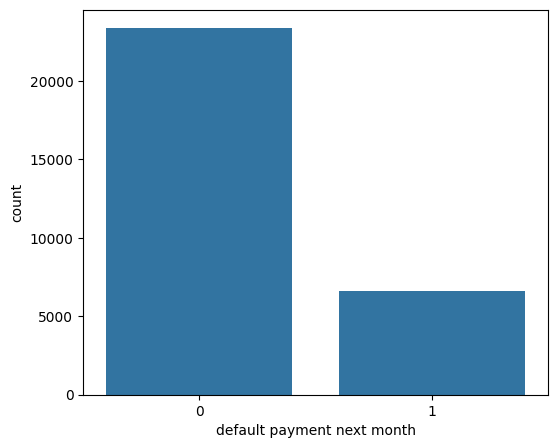

In [12]:
plt.figure(figsize=(6,5))
sns.countplot(x='default payment next month',data=df)

In [13]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

<AxesSubplot: xlabel='AGE', ylabel='count'>

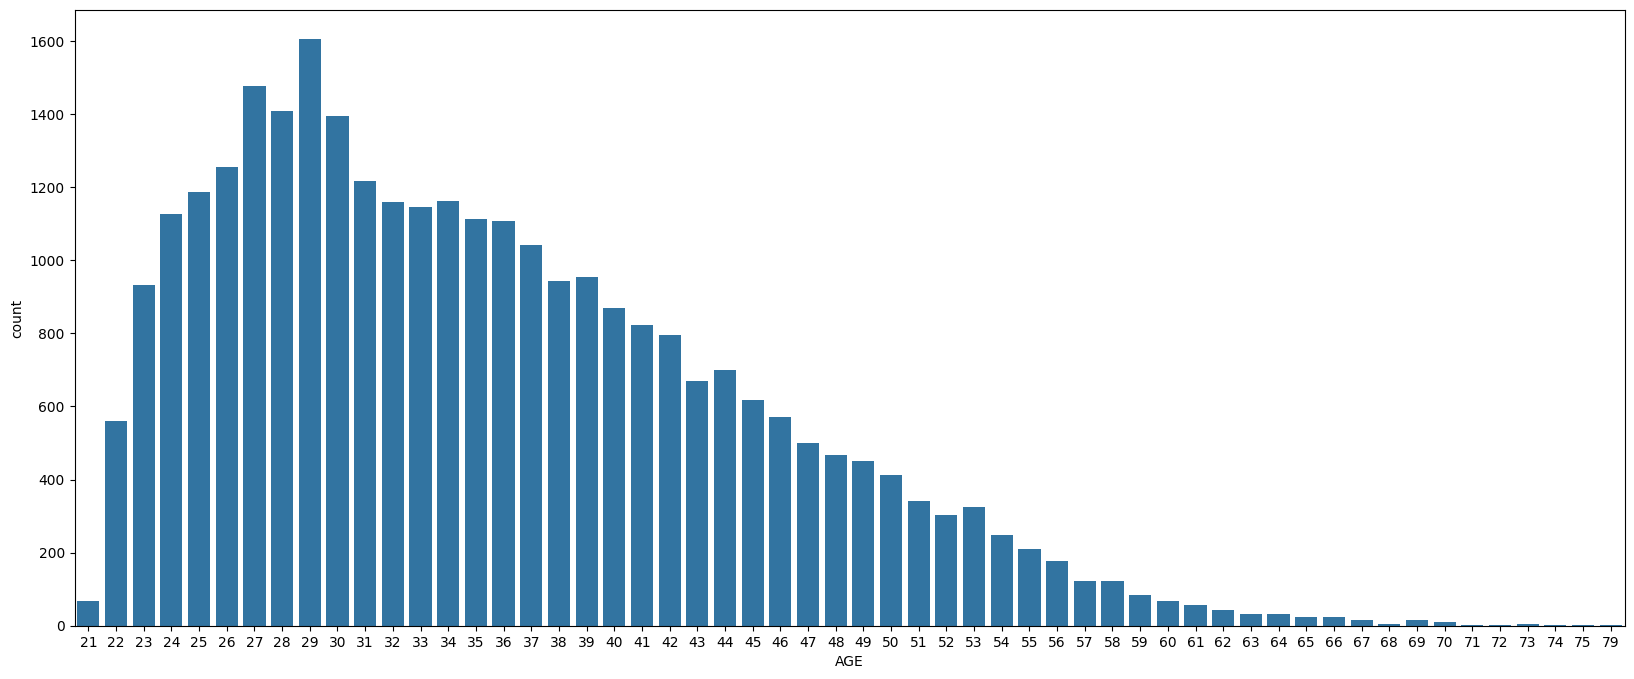

In [14]:
plt.figure(figsize=(20,8))
sns.countplot(x='AGE',data=df)

<AxesSubplot: xlabel='AGE', ylabel='count'>

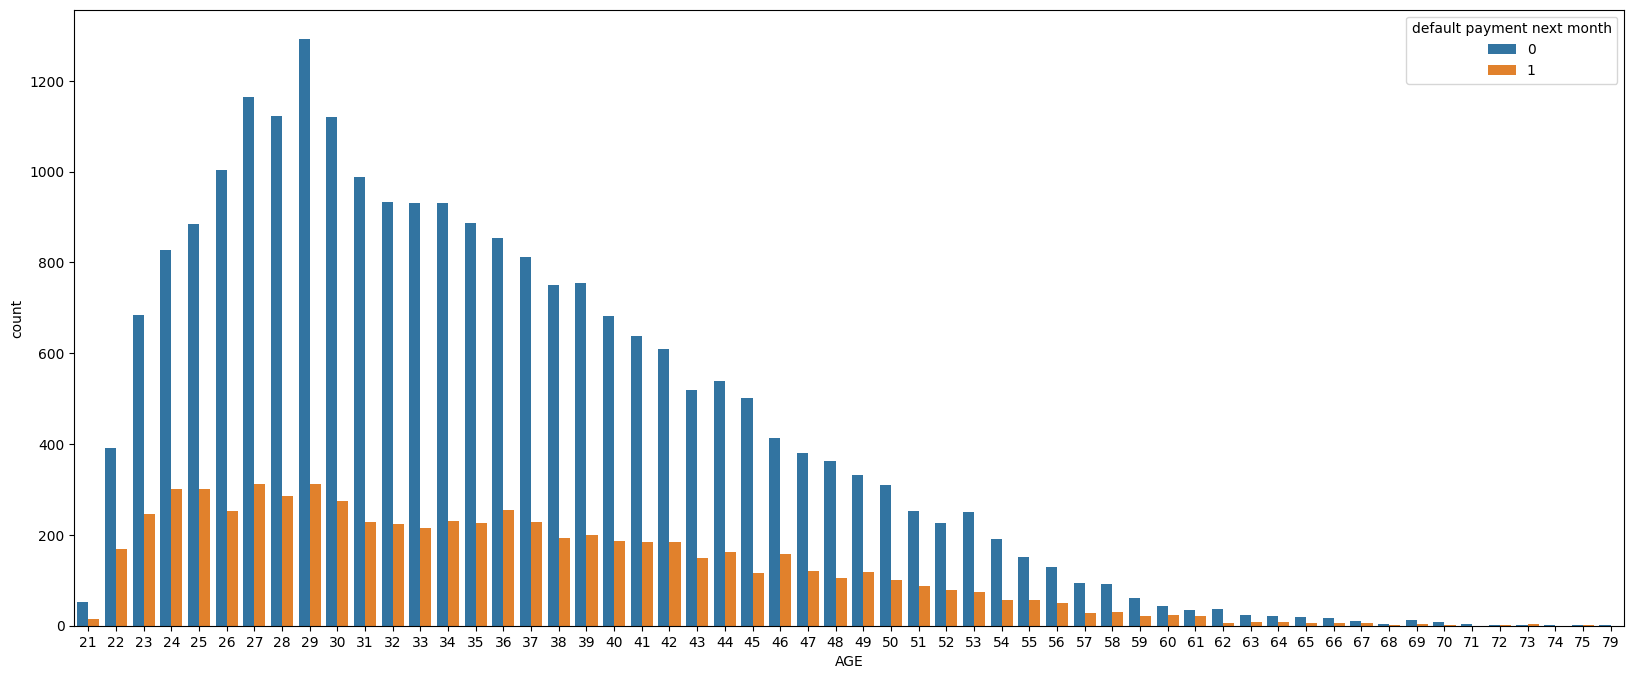

In [15]:
plt.figure(figsize=(20,8))
sns.countplot(x='AGE',hue='default payment next month',data=df)

In [16]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [18]:
X_train.shape

(21000, 24)

In [19]:
X_test.shape

(9000, 24)

In [20]:
from sklearn.linear_model import LogisticRegression


In [21]:
logi=LogisticRegression(fit_intercept=True,max_iter=10000)
logi.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [22]:
y_pred_logi=logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

In [23]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
print(accuracy_score(y_test,y_pred_logi))
#a=roc_auc_score(y_pred_logi,y_test)
#print(a)

0.7787777777777778


In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtc= DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred=dtc.predict(X_test)


In [27]:
print(accuracy_score(y_pred,y_test)) #data quality may not be suffient for tree or  more number of variables

0.7225555555555555


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc=RandomForestClassifier(n_estimators=50) # estimator = how many different variables you can estimate
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [30]:
y_pred1=rfc.predict(X_test)

In [31]:
print(accuracy_score(y_test,y_pred1))

0.815
